In [8]:
import re
import warnings
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from bs4 import BeautifulSoup #html texts clean kore

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', 60)
# pd.set_option("display.max_colwidth", -1)
init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

In [2]:
df_med = pd.read_csv('https://raw.githubusercontent.com/masumhasan/medicine_Uses_Analysys_Bangladesh/main/data/medicine.csv', encoding = "utf-8")

In [3]:
df_med

,brand id,brand name,type,slug,dosage form,generic,strength,manufacturer,package container,Package Size
0,4077,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,4006,A-Cof,allopathic,a-cofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,6174,A-Clox,allopathic,a-cloxinjection500-mgvial,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,6173,A-Clox,allopathic,a-cloxinjection250-mgvial,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,6172,A-Clox,allopathic,a-cloxpowder-for-suspension125-mg5-ml,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN
...,...,...,...,...,...,...,...,...,...,...
21709,12005,Zytec,allopathic,zytectablet10-mg,Tablet,Cetirizine Hydrochloride,10 mg,Desh Pharmaceuticals Ltd.,"Unit Price: ৳ 1.50,(100's pack: ৳ 150.00),",(100's pack: ৳ 150.00)
21710,31435,Zypred,allopathic,zypredophthalmic-suspension0503,Ophthalmic Suspension,Loteprednol Etabonate + Gatifloxacin,0.5%+0.3%,Aristopharma Ltd.,5 ml drop: ৳ 250.00,NaN
21711,30406,Zymet Pro,allopathic,zymet-procapsule325-mg,Capsule,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 10.00,(90's pack: ৳ 900.00),,Unit Price: ৳...","(90's pack: ৳ 900.00),(60's pack: ৳ 600.00)"
21712,2435,Zymet,allopathic,zymettablet325-mg,Tablet,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 3.50,(100's pack: ৳ 350.00),",(100's pack: ৳ 350.00)


In [4]:
#We don't need slug column, let's drop it.

#The brand_id column might be needed for analysis with associated data
df_med.drop(["slug"],axis=1, inplace=True)

In [6]:
df_med.head()

,brand id,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
0,4077,A-Cold,allopathic,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,4006,A-Cof,allopathic,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,6174,A-Clox,allopathic,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,6173,A-Clox,allopathic,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,6172,A-Clox,allopathic,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN


In [9]:
printmd(f"Medicine dataset Dimension: ~**{df_med.shape[0]}** medicines,  **{df_med.shape[1]}** columns")

Medicine dataset Dimension: ~**21714** medicines,  **9** columns

In [10]:
df_med.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21714 entries, 0 to 21713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand id           21714 non-null  int64 
 1   brand name         21714 non-null  object
 2   type               21714 non-null  object
 3   dosage form        21714 non-null  object
 4   generic            21712 non-null  object
 5   strength           20865 non-null  object
 6   manufacturer       21714 non-null  object
 7   package container  21672 non-null  object
 8   Package Size       13935 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


In [11]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_med.index),len(df_med.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 21714
Unique observations: 21714


**No duplicates Found!**

### Summary of Features

In [14]:
df_med.describe(include=['object']).T

,count,unique,top,freq
brand name,21714,13934,Renova,9
type,21714,2,allopathic,21363
dosage form,21714,112,Tablet,9329
generic,21712,1661,Cefixime Trihydrate,341
strength,20865,1033,500 mg,1298
manufacturer,21714,232,Incepta Pharmaceuticals Ltd.,1182
package container,21672,7364,"Unit Price: ৳ 10.00,(30's pack: ৳ 300.00),",505
Package Size,13935,3531,(30's pack: ৳ 300.00),509


In [15]:
def missing_value_describe(data):
    # check missing values in the data
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    # missing_value_stats = missing_value_pct_stats.sort_values(ascending=False)[:missing_value_col_count]
    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percentage(%)'])

    print("Number of rows with at least 1 missing values:", data.isna().any(axis = 1).sum())
    print("Number of columns with missing values:", missing_value_col_count)

    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        display(missing_data[:missing_value_col_count])

        # plot missing values
        missing = data.isnull().sum()
        missing = missing[missing > 0]
        missing.sort_values(inplace=True)
        missing.plot.bar(figsize=(10,8))
    else:
        print("No missing data!!!")

Number of rows with at least 1 missing values: 8235
Number of columns with missing values: 4

Missing percentage (desceding):


,Total,Percentage(%)
Package Size,7779,35.824813
strength,849,3.909920
package container,42,0.193424
generic,2,0.009211


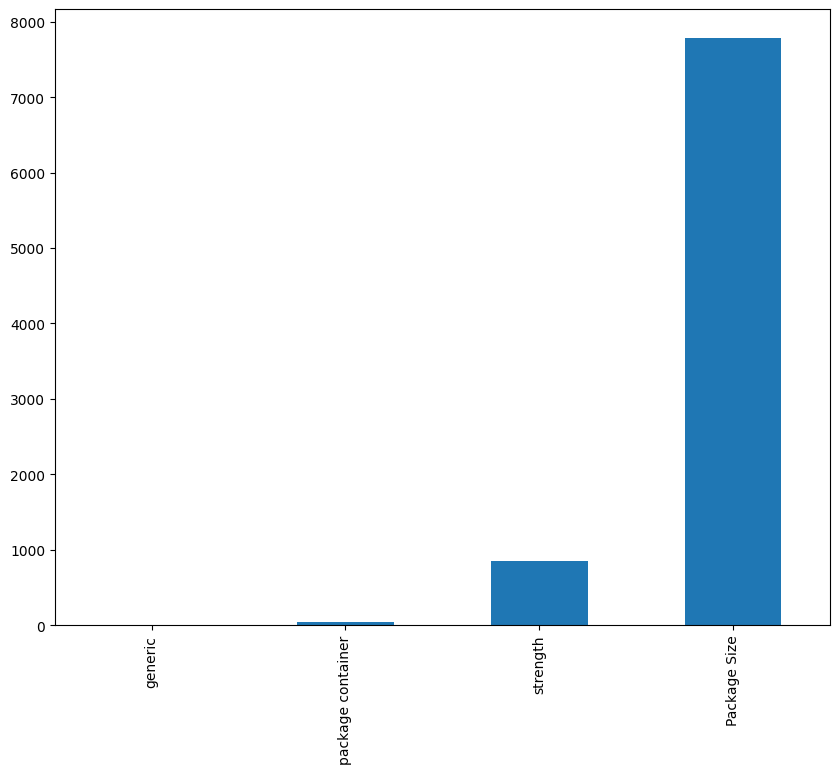

In [16]:
missing_value_describe(df_med)

In [17]:
fig = px.pie(df_med['type'].value_counts().reset_index().rename(columns={'index':'Type', 'type':'count'}), values='count', names='Type', title='Medicine Types')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
printmd("#### Huge gap between allopathic and herbal medicines")

#### Huge gap between allopathic and herbal medicines

In [18]:
def top_plot(col_name, rows):
    # https://stackoverflow.com/a/50169502/11105356
    tdf = pd.concat([df_med[col_name].value_counts(), df_med[col_name]
               .value_counts(normalize=True)], 
              axis=1, keys=('counts','percentage')).reset_index().rename(columns={'index':col_name.title()}).head(rows)

    # https://stackoverflow.com/a/65242391/11105356
    tdf['count_pct'] =  tdf['counts'].astype(str) + tdf['percentage'].apply(lambda x: ' ({0:1.2f}%)'.format(x))

    # https://stackoverflow.com/a/63571261/11105356
    fig = px.bar(tdf,
                x=col_name.title(),
                 y='counts', 
                 title='Top '+col_name.title(),
                 text= 'count_pct' )
    fig.update_layout(yaxis_title="Count")
    # fig.update_traces(textposition='inside')
    
    fig.show()

In [19]:
col_name = 'dosage form'
top_plot(col_name, 10)

In [20]:
col_name = 'manufacturer'
top_plot(col_name, 10)